In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pickle
import os

In [2]:
os.chdir("C:\\Users\\Riya\\Documents\\Codesoft\\Credit Card Fraud Detection\\Credit-Card-Spam-Detection")
df = pd.read_csv("CSD_FT.csv")
df

,amt,unix_time,gender_le,merchant_le,state_le,category_le,fullname_le,is_fraud
0,-0.424463,-1.703871,1.102494,-0.119663,0.937072,0.961683,-0.327833,0
1,-0.252337,-1.703869,-0.907034,1.231656,1.220424,0.961683,-0.133723,0
2,-0.179353,-1.703865,-0.907034,1.331017,0.512044,-0.316151,-1.496303,0
3,-0.059605,-1.703861,1.102494,-0.601568,-1.258908,0.706116,-1.347865,0
4,-0.422358,-1.703861,1.102494,-0.253802,-0.338013,1.728384,0.817800,0
...,...,...,...,...,...,...,...,...
555714,-0.163467,1.510350,1.102494,0.814337,-0.196337,-0.316151,0.688393,0
555715,0.270803,1.510351,1.102494,-0.392908,1.149586,0.194983,-0.042376,0
555716,0.111564,1.510352,-0.907034,0.759688,1.432939,0.194983,-1.538170,0
555717,-0.391735,1.510354,1.102494,-1.331876,-0.975555,1.728384,-0.677993,0


### Seperating dependent and independent variables  

In [3]:
X = df.iloc[:,:-1].values
X

array([[-0.42446311, -1.70387057,  1.10249443, ...,  0.93707226,
         0.9616832 , -0.32783314],
       [-0.25233729, -1.70386903, -0.90703406, ...,  1.2204245 ,
         0.9616832 , -0.13372256],
       [-0.17935288, -1.70386518, -0.90703406, ...,  0.5120439 ,
        -0.31615123, -1.49630268],
       ...,
       [ 0.11156401,  1.5103518 , -0.90703406, ...,  1.43293868,
         0.19498254, -1.53816966],
       [-0.39173496,  1.51035353,  1.10249443, ..., -0.97555537,
         1.72838387, -0.67799339],
       [-0.19944911,  1.51035546,  1.10249443, ...,  0.65372002,
        -1.59398566,  1.16034793]])

In [4]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Train Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

### Model Selection

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report

Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
pickle.dump(lr, open('lr.pkl','wb'))

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[188192     37]
 [   716      0]]
Accuracy by confusion matrix: 0.9960147132763503


                  precision    recall  f1-score   support

without diabetes       1.00      1.00      1.00    188229
   with diabetes       0.00      0.00      0.00       716

        accuracy                           1.00    188945
       macro avg       0.50      0.50      0.50    188945
    weighted avg       0.99      1.00      0.99    188945

----------------------------------------------------------------------


In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
pickle.dump(gnb, open('gnb.pkl','wb'))

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[187174   1055]
 [   381    335]]
Accuracy by confusion matrix: 0.9923999047341819


                  precision    recall  f1-score   support

without diabetes       1.00      0.99      1.00    188229
   with diabetes       0.24      0.47      0.32       716

        accuracy                           0.99    188945
       macro avg       0.62      0.73      0.66    188945
    weighted avg       1.00      0.99      0.99    188945

----------------------------------------------------------------------


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
pickle.dump(knn, open('knn.pkl','wb'))

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[188057    172]
 [   419    297]]
Accuracy by confusion matrix: 0.9968721056392071


                  precision    recall  f1-score   support

without diabetes       1.00      1.00      1.00    188229
   with diabetes       0.63      0.41      0.50       716

        accuracy                           1.00    188945
       macro avg       0.82      0.71      0.75    188945
    weighted avg       1.00      1.00      1.00    188945

----------------------------------------------------------------------


In [12]:
os.chdir("C:\\Users\\Riya\\Documents\\Codesoft\\Credit Card Fraud Detection\\Credit-Card-Spam-Detection")
df_copy = pd.read_csv("cardfraud.csv")

In [13]:
df_copy.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Evaluating Model

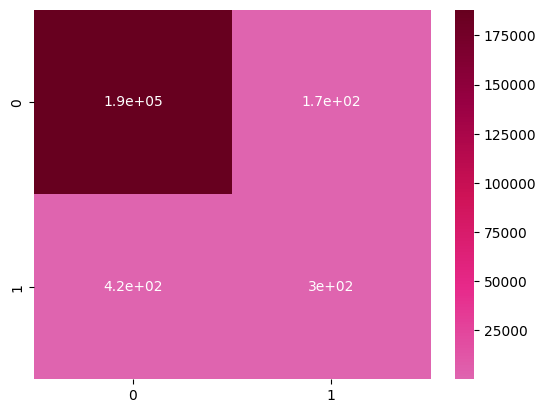

In [14]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

In [15]:
Y_pred = lr.predict(X)

In [16]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_results = pd.concat([df_copy, Y_pred], axis=1)
df_results.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Y_pred
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0


<Axes: title={'center': 'Predicted'}, xlabel='amt', ylabel='unix_time'>

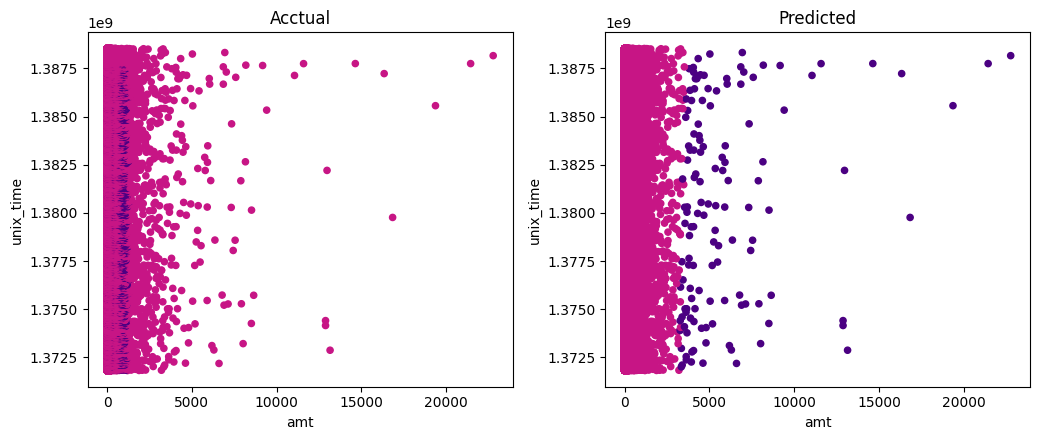

In [17]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_results.plot.scatter("amt","unix_time",title="Acctual",ax=axis[0],c=df_results['is_fraud'].map(colors))
df_results.plot.scatter("amt","unix_time",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))